* 학습: https://www.notion.so/teammemori/Week-4-Python-e373f1a20444470cbfbc54c58a8076f8
* 미션: https://www.notion.so/Week-4-Python-35a2766d27034f53905185de00822d50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/readyme

/content/drive/MyDrive/readyme




```
#F12 누르고 console 창에 복붙 후 런타임 재시작
function ClickConnect(){
    console.log("코랩 연결 끊김 방지"); 
    document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect, 60 * 1000)
```



# __Q1. 분석 목표 설정__

> 요즘 핫한 포켓몬빵의 중고거래 가격이 어떻게 책정되고 있는지 궁금해서 이를 알아보기 위한 분석 실시

- 포켓몬빵 가격 분포 확인
- 동네별 포켓몬빵 거래량 확인
- 동네별 가격 차이가 있는지 확인
- 동네와 가격의 회귀분석


# __Q2. 데이터 수집__

> 2주차 과제에서 작성했던 당근마켓 크롤링 코드를 활용하여 데이터 수집

In [ ]:
#셀레니움 설치
!pip install Selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver

     |████████████████████████████████| 968 kB 14.2 MB/s 
     |████████████████████████████████| 138 kB 59.5 MB/s 
     |████████████████████████████████| 359 kB 53.5 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 3.6 MB 66.6 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 http://security.ubunt

In [ ]:
#라이브러리 로드
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver import ActionChains as AC 
from selenium.webdriver.common.keys import Keys
from tqdm import tqdm
from tqdm.notebook import tqdm
import re
from time import sleep
import time
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#크롤러 정의
def carrotcrawler(query, n):
    
    #라이브러리 로드
    import pandas as pd
    import numpy as np
    from selenium import webdriver 
    from selenium.webdriver.common.keys import Keys
    from tqdm import tqdm
    from tqdm.notebook import tqdm
    import re
    from time import sleep
    import time
    import warnings
    warnings.filterwarnings(action='ignore')
    
    #드라이버 정의
    url = 'https://www.daangn.com/'
    driver = webdriver.Chrome('/Users/diekim/downloads/chromedriver')
    driver.get(url)
    driver.maximize_window()
    time.sleep(1)
    
    #검색어 입력
    query = query                           
    element = driver.find_element_by_xpath('/html/body/header/div/section[1]/div/input') 
    element.send_keys(query) 
    element.send_keys(Keys.RETURN) 
    time.sleep(1)
    
    #최종 데이터를 담을 객체 생성
    df = pd.DataFrame()
    title_list = []
    address_list = []
    price_list = []
    like_list = []
    link_list = []

    try: #물건 기준 검색일 경우 더보기 클릭(한 번에 12개씩)
        element = driver.find_element_by_xpath('/html/body/section[2]/div[1]/div[2]')
        cnt = 0
        while cnt<=1000:
            cnt+=1 
            element.click()
            time.sleep(1)
    except: #물건 기준이 아니면 안함
        pass
    
    #데이터 크롤링
    for i in range(n):
        print('{}번째 상품 크롤링 중...'.format(i+1))
        
        try: #중간에 오류가 안나면 총 n개 수집
            #제목
            title = driver.find_element_by_xpath('/html/body/section[2]/div[1]/div[1]/article['+str(i+1)+']/a/div[2]/div/span[1]').text
            title_list.append(title)
            #주소
            address = driver.find_element_by_xpath('/html/body/section[2]/div[1]/div[1]/article['+str(i+1)+']/a/div[2]/p[1]').text
            address_list.append(address)
            #가격(나눔, -인 경우도 존재)
            price = driver.find_element_by_xpath('/html/body/section[2]/div[1]/div[1]/article['+str(i+1)+']/a/div[2]/p[2]').text
            price_list.append(price)
            #관심(없는 경우도 존재) 
            try: #관심이 존재하면 수집
                like = driver.find_element_by_xpath('/html/body/section[2]/div[1]/div[1]/article['+str(i+1)+']/a/div[2]/section/span').text
                like_list.append(like)
            except: #관심이 없으면 0으로 채우기
                like_list.append(0)
            #링크
            link = driver.find_element_by_xpath('/html/body/section[2]/div[1]/div[1]/article['+str(i+1)+']/a').get_attribute('href')
            link_list.append(link)
            time.sleep(1)  
        except: #개수가 부족해서 오류가 나면 거기까지만 
            break
    
    #최종 데이터 저장
    df['title'] = title_list
    df['address'] = address_list
    df['price'] = price_list
    df['like'] = like_list
    df['link'] = link_list
    
    #드라이버 종료
    driver.quit()
    
    return df
    

In [ ]:
#실제 크롤링
df = carrotcrawler('포켓몬', 10000)

1번째 상품 크롤링 중...
2번째 상품 크롤링 중...
3번째 상품 크롤링 중...
4번째 상품 크롤링 중...
5번째 상품 크롤링 중...
6번째 상품 크롤링 중...
7번째 상품 크롤링 중...
8번째 상품 크롤링 중...
9번째 상품 크롤링 중...
10번째 상품 크롤링 중...
11번째 상품 크롤링 중...
12번째 상품 크롤링 중...
13번째 상품 크롤링 중...
14번째 상품 크롤링 중...
15번째 상품 크롤링 중...
16번째 상품 크롤링 중...
17번째 상품 크롤링 중...
18번째 상품 크롤링 중...
19번째 상품 크롤링 중...
20번째 상품 크롤링 중...
21번째 상품 크롤링 중...
22번째 상품 크롤링 중...
23번째 상품 크롤링 중...
24번째 상품 크롤링 중...
25번째 상품 크롤링 중...
26번째 상품 크롤링 중...
27번째 상품 크롤링 중...
28번째 상품 크롤링 중...
29번째 상품 크롤링 중...
30번째 상품 크롤링 중...
31번째 상품 크롤링 중...
32번째 상품 크롤링 중...
33번째 상품 크롤링 중...
34번째 상품 크롤링 중...
35번째 상품 크롤링 중...
36번째 상품 크롤링 중...
37번째 상품 크롤링 중...
38번째 상품 크롤링 중...
39번째 상품 크롤링 중...
40번째 상품 크롤링 중...
41번째 상품 크롤링 중...
42번째 상품 크롤링 중...
43번째 상품 크롤링 중...
44번째 상품 크롤링 중...
45번째 상품 크롤링 중...
46번째 상품 크롤링 중...
47번째 상품 크롤링 중...
48번째 상품 크롤링 중...
49번째 상품 크롤링 중...
50번째 상품 크롤링 중...
51번째 상품 크롤링 중...
52번째 상품 크롤링 중...
53번째 상품 크롤링 중...
54번째 상품 크롤링 중...
55번째 상품 크롤링 중...
56번째 상품 크롤링 중...
57번째 상품 크롤링 중...
58번째 상품 크롤링 중...
59번째 상품 크롤링 중...
60번째 상

In [ ]:
#데이터 확인
df

,title,address,price,like,link
0,교환)포켓몬띠부씰 포켓몬씰 포켓몬빵,서울 강서구 화곡제6동,"1,500원",0,https://www.daangn.com/articles/381510758
1,(가격내림) 포켓몬 띠부띠부씰 포켓몬 스티커 포켓몬빵 띠부실 리자몽 어니부기 독침붕...,부산 사상구 덕포제1동,"16,000원",0,https://www.daangn.com/articles/386253621
2,이상해꽃| 포켓몬빵 스티커 포켓몬 띠부띠부씰[포켓몬스티커],경북 포항시 남구 오천읍,"4,000원",1,https://www.daangn.com/articles/387472208
3,"독파리,야도란,이상해꽃| 포켓몬빵 스티커 포켓몬 띠부띠뿌씰[포켓몬스티커]",경북 포항시 남구 오천읍,"2,000원",1,https://www.daangn.com/articles/387477979
4,"포켓몬 띠부씰 판매합니다. (포켓몬 스티커, 포켓몬 띠부띠부씰)",광주 서구 금호동,"1,500원",0,https://www.daangn.com/articles/387460406
...,...,...,...,...,...
9985,포켓몬빵 띠부실,제주 서귀포시 하원동,10원,0,https://www.daangn.com/articles/386017532
9986,포켓몬카드 난천의패기 하이퍼레어,경기도 용인시 기흥구 구성동,"15,000원",3,https://www.daangn.com/articles/376251207
9987,<미개봉>포켓몬빵 초코롤 팝니다!,서울 서대문구 홍은제2동,"4,500원",2,https://www.daangn.com/articles/387407182
9988,포켓몬 빵 띠부띠부실 나인테일,경기도 부천시 상동,"3,000원",1,https://www.daangn.com/articles/382627952


In [ ]:
#데이터 저장
df.to_csv('당근마켓_포켓몬_0413.csv', encoding='utf-8-sig', index=False)

* 10,000개를 목표로 크롤링 했으나 아쉽게도 당근마켓에 포켓몬 게시글이 9990개였음
* 이무튼 이 데이터를 최종 데이터프레임으로 저장하여 분석 진행

# __Q3. 데이터 전처리 및 시각화__

### 라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

#한글 폰트 - 주피터
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    # Mac인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False 

In [ ]:
# import pandas as pd
# import numpy as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings(action='ignore')

# #한글 폰트 - 코랩
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic') 

# #이후 런타임 재시작

### 데이터 확인

In [ ]:
#데이터 로드
df_origin = pd.read_csv('당근마켓_포켓몬_0413.csv')

In [ ]:
#원본 살려놓기
df = df_origin.copy()

In [ ]:
#상위 5개 값 확인
df.head()

,title,address,price,like,link
0,교환)포켓몬띠부씰 포켓몬씰 포켓몬빵,서울 강서구 화곡제6동,"1,500원",0,https://www.daangn.com/articles/381510758
1,(가격내림) 포켓몬 띠부띠부씰 포켓몬 스티커 포켓몬빵 띠부실 리자몽 어니부기 독침붕...,부산 사상구 덕포제1동,"16,000원",0,https://www.daangn.com/articles/386253621
2,이상해꽃| 포켓몬빵 스티커 포켓몬 띠부띠부씰[포켓몬스티커],경북 포항시 남구 오천읍,"4,000원",1,https://www.daangn.com/articles/387472208
3,"독파리,야도란,이상해꽃| 포켓몬빵 스티커 포켓몬 띠부띠뿌씰[포켓몬스티커]",경북 포항시 남구 오천읍,"2,000원",1,https://www.daangn.com/articles/387477979
4,"포켓몬 띠부씰 판매합니다. (포켓몬 스티커, 포켓몬 띠부띠부씰)",광주 서구 금호동,"1,500원",0,https://www.daangn.com/articles/387460406


In [ ]:
#요약통계량 확인
df.describe()

,price,like
count,5.869000e+03,5869.000000
mean,3.896787e+06,0.817175
std,6.614547e+07,1.888726
min,0.000000e+00,0.000000
25%,2.000000e+03,0.000000
50%,5.000000e+03,0.000000
75%,1.100000e+04,1.000000
max,2.000000e+09,74.000000


In [ ]:
#결측값 확인
df.isnull().sum()

title      0
address    0
price      0
like       0
link       0
dtype: int64

* 결측값 없음

In [ ]:
#중복값 확인
df.duplicated().sum()

2256

* 꽤나 많은 중복값
* 이는 동일 인물이 똑같은 글을 여러번 올렸기 때문

In [ ]:
#중복값 제거
df = df.drop_duplicates()
df.duplicated().sum()

0

* row가 사라지는 건 아쉽지만... 중복값 제거

### 데이터 전처리

__1. title 변수__
* title 변수에 ['빵', '스티커', '띠부', '씰']이라는 단어가 들어가지 않으면 제외
* 즉, 포켓몬빵에 대해서만 분석하기 위해서 그외 포켓몬 관련 제품은 제거

In [ ]:
df['title'].unique().tolist()

['교환)포켓몬띠부씰 포켓몬씰 포켓몬빵',
 '(가격내림) 포켓몬 띠부띠부씰 포켓몬 스티커 포켓몬빵 띠부실 리자몽 어니부기 독침붕 꼬렛 코얼 두두 미뇽',
 '이상해꽃| 포켓몬빵 스티커 포켓몬 띠부띠부씰[포켓몬스티커]',
 '독파리,야도란,이상해꽃| 포켓몬빵 스티커 포켓몬 띠부띠뿌씰[포켓몬스티커]',
 '포켓몬 띠부씰 판매합니다. (포켓몬 스티커, 포켓몬 띠부띠부씰)',
 '[망나뇽 미개봉] 포켓몬띠부씰 포켓몬스티커 포켓몬빵스티커 띠부띠부 띠부띠부씰 띠뿌씰',
 '교환))포켓몬띠부씰 포켓몬띠부띠부씰 포켓몬빵 포켓몬스티커',
 '포켓몬빵포켓몬빵포켓몬빵포켓몬빵',
 '[망키 미개봉] 포켓몬띠부씰 포켓몬스티커 포켓몬빵스티커 띠부띠부 띠부띠부씰 띠뿌씰',
 '[고지,질뻐기 미개봉] 포켓몬띠부씰 포켓몬스티커 포켓몬빵스티커 띠부띠부 띠부띠부씰 띠뿌씰',
 '포켓몬빵 시즌2 포켓몬디저트 포켓몬빵',
 '포켓몬빵 포켓몬디저트 포켓몬빵 시즌2',
 '포켓몬빵 포켓몬 띠부띠부씰 라플레시아',
 '포켓몬빵시즌2 포켓몬띠부실 양면띠부실',
 '삼립 포켓몬 씰북 / 포켓몬빵 / 띠부씰 / 띠부띠부 / 삼립',
 '포켓몬 스티커 ( 전설 포켓몬 )',
 '포켓몬 띠뿌띠뿌씰 포켓몬 스티커',
 '새로 나온 포켓몬빵이랑 포켓몬 스티커랑 교환해요!!',
 '포켓몬 스티커랑 포켓몬 빵 교환해요',
 '포켓몬빵 정가로 교환원해요! 일반 포켓몬빵으로!',
 '포켓몬카드와 포켓몬 가오레 교환 원합니다(5성)',
 '저동중학교 부근 포켓몬망 포켓몬디저트 피카츄 망고 컵케익 컵케이크 컵케잌',
 '포켓몬빵 피치피치슈 포켓몬카드 hr랑 교환원해요',
 '[구함] 포켓몬빵 띠부띠부씰 스티커 포켓몬씰',
 '띠부띠부씰 판매합니다! 4개 포켓몬 씰 포켓몬스티커',
 '포켓몬빵 야돈 스티커 / 포켓몬 띠부씰 판매합니다! / 가격제안가능!!',
 '포켓몬 띠쁘실 중도포기 판매합니다(+ 구할수없는 핸드메이드 포켓몬쁘띠씰 무광 스집북)',
 '포켓몬빵 스티커 띠부씰 포켓몬스티커',
 '포켓몬 포켓몬빵 씰 띠부씰 띠

In [ ]:
print(df.shape)
df = df.query('title.str.contains("빵|스티커|띠부|씰")', engine='python').reset_index(drop=True)
print(df.shape)

(7734, 5)
(5869, 5)


__2. address 변수__
* address 변수를 이용해 address_si 변수 추가
* 처음에 시군구로 나누려고 했으나 주소 표기법이 일정하지 않아서 대분류인 지역 정보만 추가
* 분류 단위가 좀더 커졌으므로 지역별로 좀더 유의한 도수가 나올 것이라 기대 

In [ ]:
df['address_all'] = df['address'].apply(lambda x: x.split())
df['address_si'] = df['address'].apply(lambda x: x.split()[0])
#df['address_gu'] = df['address'].apply(lambda x: x.split()[1])
#df['address_dong'] = df['address'].apply(lambda x: x.split()[2])

print(df.address_all.value_counts())
print(df.address_si.value_counts())

[충남, 천안시, 서북구, 불당동]    23
[서울, 관악구, 신림동]         22
[경남, 양산시, 물금읍]         21
[서울, 관악구, 봉천동]         20
[충남, 천안시, 서북구, 두정동]    20
                       ..
[전북, 김제시, 요촌동]          1
[서울, 성북구, 보문동6가]        1
[경북, 김천시, 신음동]          1
[경북, 경산시, 계양동]          1
[제주, 서귀포시, 하원동]         1
Name: address_all, Length: 2242, dtype: int64
경기도    1415
서울     1395
인천      408
부산      374
대구      348
경남      342
광주      206
충남      201
경북      199
대전      179
전북      165
충북      158
울산      143
강원도     140
전남      108
세종시      45
제주       43
Name: address_si, dtype: int64


__3. price 변수__
* price 변수를 수치형으로 바꿔줌

In [ ]:
df.price.value_counts()

5,000원        739
2,000원        445
3,000원        400
1원            356
4,000원        324
             ... 
2,222,222원      1
680,000원        1
1,122원          1
25,500원         1
900원            1
Name: price, Length: 237, dtype: int64

In [ ]:
def myprice(x):
    #'원' 제거
    x = x[:-1]
    #',' 제거
    import re
    x = re.sub(',' , "", x)
    #price='': 당근마켓에 가격제시로 올라온 값이므로 결측값 처리
    if x=='':
        return np.nan
    #price='나': 당근마켓에 나눔으로 올라온 값이므로 0으로 채움
    elif x=='나':
        return 0
    else:
        return int(x)

df['price'] = df['price'].apply(myprice)

In [ ]:
#가격 결측값은 동네별 중앙값으로 대체(극단값이 존재하므로 평균은 부적절)
df['price'] = df['price'].fillna(df['price'].median())

In [ ]:
df.head()

,title,address,price,like,link,address_all,address_si
0,교환)포켓몬띠부씰 포켓몬씰 포켓몬빵,서울 강서구 화곡제6동,1500.0,0,https://www.daangn.com/articles/381510758,"[서울, 강서구, 화곡제6동]",서울
1,(가격내림) 포켓몬 띠부띠부씰 포켓몬 스티커 포켓몬빵 띠부실 리자몽 어니부기 독침붕...,부산 사상구 덕포제1동,16000.0,0,https://www.daangn.com/articles/386253621,"[부산, 사상구, 덕포제1동]",부산
2,이상해꽃| 포켓몬빵 스티커 포켓몬 띠부띠부씰[포켓몬스티커],경북 포항시 남구 오천읍,4000.0,1,https://www.daangn.com/articles/387472208,"[경북, 포항시, 남구, 오천읍]",경북
3,"독파리,야도란,이상해꽃| 포켓몬빵 스티커 포켓몬 띠부띠뿌씰[포켓몬스티커]",경북 포항시 남구 오천읍,2000.0,1,https://www.daangn.com/articles/387477979,"[경북, 포항시, 남구, 오천읍]",경북
4,"포켓몬 띠부씰 판매합니다. (포켓몬 스티커, 포켓몬 띠부띠부씰)",광주 서구 금호동,1500.0,0,https://www.daangn.com/articles/387460406,"[광주, 서구, 금호동]",광주


### 데이터 시각화

In [ ]:
#전처리한 데이터 살려놓기
df_preprocess = df
df = df_preprocess.copy()

<BarContainer object of 17 artists>

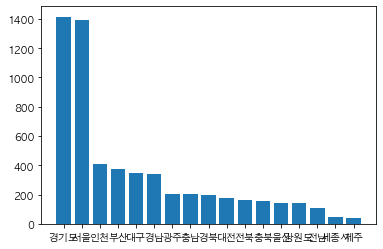

In [ ]:
#지역별 포켓몬빵 개수
count = df['address_si'].value_counts()
plt.bar(x=count.index, height=count.values)

* 경기도와 서울이 다른 지역들보다 압도적으로 많음을 확인할 수 있습니다.

<AxesSubplot:>

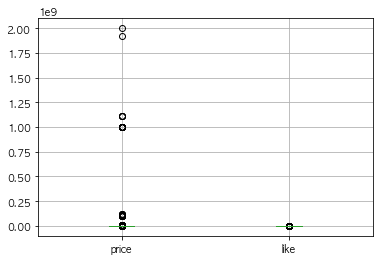

In [ ]:
#수치형 변수 boxplot
df.boxplot()

* price 스케일이 너무 커서 제대로 시각화되지 않음

<AxesSubplot:xlabel='price', ylabel='Density'>

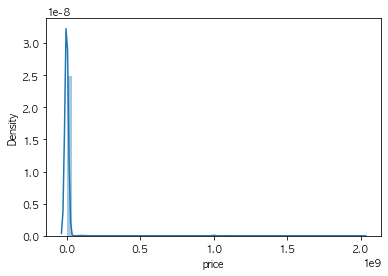

In [ ]:
#price 분포
sns.distplot(df['price'])

* price의 분포를 확인해봐도 너무 왼쪽으로 치우친 모양임을 확인해 로그변환을 진행하기로 함

<AxesSubplot:xlabel='log_price', ylabel='Density'>

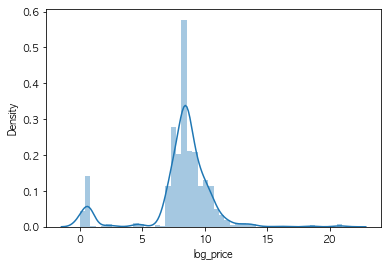

In [ ]:
#price 로그변환 후 분포
df['log_price'] = np.log1p(df['price'])
sns.distplot(df['log_price'])

* 로그변환을 했음에도 정규분포 모양은 아님 
* 이는 당근마켓 가격 특성상 0원으로 올려놓고 가격제시를 하거나, 나눔이면 0으로 대체되어 0 값을 많이 가지기 때문으로 유추함

<AxesSubplot:xlabel='like', ylabel='Density'>

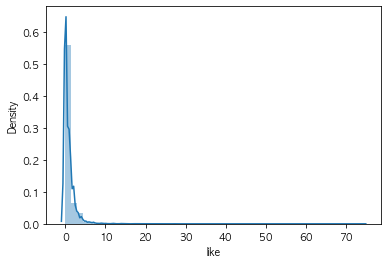

In [ ]:
#like 분포
sns.distplot(df['like'])

* like 변수도 왼쪽으로 치우친 분포지만 좋아요값 특성상 이를 변환하면 정보손실이 클 것이라고 판단함
* 따라서 로그변환이나 스케일링 대신, 좋아요 구간별 칼럼을 생성하기로 함

In [ ]:
df['like'].describe()

count    5869.000000
mean        0.817175
std         1.888726
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        74.000000
Name: like, dtype: float64

In [ ]:
df['like'].value_counts()

0     3436
1     1414
2      571
3      195
4      108
5       43
6       30
7       24
9       10
8        8
12       6
10       6
14       4
17       2
15       2
11       2
27       1
20       1
74       1
18       1
13       1
19       1
21       1
40       1
Name: like, dtype: int64

* 막상 보니 0이 반 이상을 차지하므로 이정도면 like가 있고 없고로 나눠도 되겠다고 판단

In [ ]:
df['binary_like'] = df['like'].apply(lambda x: 0 if x==0 else 1)

* 따라서 관심이 없으면 0, 있으면 1 값을 가지는 binary_like 칼럼 생성

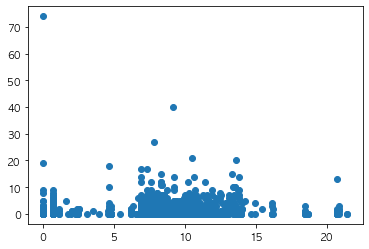

In [ ]:
#가격과 관심수의 상관관계
plt.scatter(df['log_price'], df['like'])

* 특별한 상관관계가 보이진 않는다.

# __Q4. 데이터 분석__

__1. Prepare__

In [ ]:
#최종 데이터
import pandas as pd
#df.to_csv('당근마켓_포켓몬_전처리.csv', encoding='utf-8-sig', index=False)
df = pd.read_csv('당근마켓_포켓몬_전처리.csv')
df

,title,address,price,like,link,address_all,address_si,log_price,binary_like
0,교환)포켓몬띠부씰 포켓몬씰 포켓몬빵,서울 강서구 화곡제6동,1.500000e+03,0,https://www.daangn.com/articles/381510758,"['서울', '강서구', '화곡제6동']",서울,7.313887,0
1,(가격내림) 포켓몬 띠부띠부씰 포켓몬 스티커 포켓몬빵 띠부실 리자몽 어니부기 독침붕...,부산 사상구 덕포제1동,1.600000e+04,0,https://www.daangn.com/articles/386253621,"['부산', '사상구', '덕포제1동']",부산,9.680406,0
2,이상해꽃| 포켓몬빵 스티커 포켓몬 띠부띠부씰[포켓몬스티커],경북 포항시 남구 오천읍,4.000000e+03,1,https://www.daangn.com/articles/387472208,"['경북', '포항시', '남구', '오천읍']",경북,8.294300,1
3,"독파리,야도란,이상해꽃| 포켓몬빵 스티커 포켓몬 띠부띠뿌씰[포켓몬스티커]",경북 포항시 남구 오천읍,2.000000e+03,1,https://www.daangn.com/articles/387477979,"['경북', '포항시', '남구', '오천읍']",경북,7.601402,1
4,"포켓몬 띠부씰 판매합니다. (포켓몬 스티커, 포켓몬 띠부띠부씰)",광주 서구 금호동,1.500000e+03,0,https://www.daangn.com/articles/387460406,"['광주', '서구', '금호동']",광주,7.313887,0
...,...,...,...,...,...,...,...,...,...
5864,"포켓몬 띠부띠부씰 교환,구매합니다",전북 익산시 영등2동,2.000000e+03,0,https://www.daangn.com/articles/386277361,"['전북', '익산시', '영등2동']",전북,7.601402,0
5865,포켓몬빵 파이리 꼬부기 교환,대구 북구 태전1동,5.000000e+03,1,https://www.daangn.com/articles/387402583,"['대구', '북구', '태전1동']",대구,8.517393,1
5866,포켓몬빵 교환 원해요,강원도 강릉시 포남2동,1.111111e+09,3,https://www.daangn.com/articles/373581459,"['강원도', '강릉시', '포남2동']",강원도,20.828626,1
5867,포켓몬빵 띠부실,제주 서귀포시 하원동,1.000000e+01,0,https://www.daangn.com/articles/386017532,"['제주', '서귀포시', '하원동']",제주,2.397895,0


In [ ]:
#X/y 분리
X = df.drop('price', axis=1)
y = df[['price']]

In [ ]:
#train/test 분리
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

__2. Feature Engineering__

In [ ]:
#현재 독립변수 확인
X.columns

Index(['title', 'address', 'like', 'link', 'address_all', 'address_si',
       'log_price', 'binary_like'],
      dtype='object')

* 파생칼럼도 있고, 가격 예측에 전혀 도움이 안될 변수도 존재하므로 추가 작업 필요

In [ ]:
#title
X_train['title_len'] = X_train['title'].apply(lambda x: len(x))
X_test['title_len'] = X_test['title'].apply(lambda x: len(x))

* title 그대로는 못쓰고 제목 길이 변수 추가
* 칼럼이 너무 몇개 없어서 어거지로 만들어봄..

In [ ]:
#최종 모델에 사용할 독립변수
features = ['title_len', 'binary_like', 'address_si']
X_train = X_train[features]
X_test = X_test[features]

__3. Encoding/Scaling__

In [ ]:
#Encoding: address_si는 범주형 변수이므로 인코딩 필요
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder()
X_train_cat = pd.DataFrame(en.fit_transform(X_train[['address_si']]).toarray())
X_test_cat = pd.DataFrame(en.transform(X_test[['address_si']]).toarray())

In [ ]:
#데이터 합치기 전에 인덱스 정리
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#데이터 합치기
X_train_scaled = pd.concat([X_train.iloc[:, :-1], X_train_cat], axis=1)
X_test_scaled = pd.concat([X_test.iloc[:, :-1], X_test_cat], axis=1)

In [ ]:
#Scaling: 종속변수 price 스케일링 필요
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_train_scaled = pd.DataFrame(sc.fit_transform(y_train), columns=['price'])
y_test_scaled = pd.DataFrame(sc.fit_transform(y_test), columns=['price'])

* 위에서 log_price 칼럼을 추가하긴 했지만 여전히 정규분포가 아니며, train/test도 분리해서 적용하기 위해 sklearn의 StandardScaler 이용
* 종속변수를 스케일링 하는 것이므로 모형 적합 후 해석할 때는 다시 돌려놓아야 함
* 그 외 title_len, binary_like의 경우 딱히 스케일링이 필요하지 않을 듯함

__4. Modeling__

In [ ]:
#라이브러리 로드
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings(action='ignore')
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error

In [ ]:
#모델 객체 정의
lr = LinearRegression()
ri = Ridge(random_state=1)
la = Lasso(random_state=1)
sgd = SGDRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
ext = ExtraTreesRegressor(random_state=1)

In [ ]:
#모델 선택
models = [lr, ri, la, sgd, rf, ext]
for model in models:
    name = model.__class__.__name__
    scores = cross_val_score(model, X=X_train_scaled, y=y_train_scaled,
                             cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    mae = (-1)*np.mean(scores)
    print('Model %s - MAE: %.4f' % (name, np.sqrt(mae)))  

Model LinearRegression - MAE: 0.3315
Model Ridge - MAE: 0.3313
Model Lasso - MAE: 0.3270
Model SGDRegressor - MAE: 0.3313


/Users/diekim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/diekim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/diekim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/diekim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Model RandomForestRegressor - MAE: 0.3256


/Users/diekim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/diekim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/diekim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/diekim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

Model ExtraTreesRegressor - MAE: 0.3240


* ExtraTreesRegressor - MAE: 0.3240
* 따라서 기본 성능이 가장 좋은 ExtraTree 모델을 추가로 튜닝해봄

In [ ]:
#모델 튜닝
#print(help(ExtraTreesRegressor))
params = {'n_estimators': [5, 10, 15],
          'max_features': range(0, 20),
          'min_samples_leaf': [1,2,3,4,5],
          'min_samples_split': [2,3,4,5]}
grid = GridSearchCV(ext, param_grid=params, cv=5, scoring='neg_mean_absolute_error')
grid.fit(X_train_scaled, y_train_scaled)
print((-1)*grid.best_score_, grid.best_params_)

0.10162351781239706 {'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 5}


In [ ]:
#최종 모델
final = ExtraTreesRegressor(**grid.best_params_)
final.fit(X_train_scaled, y_train_scaled)
final_pred = final.predict(X_test_scaled)
print(mean_absolute_error(final_pred, y_test_scaled))

0.1422607023515673


* 모델 튜닝 결과 성능이 많이 좋아졌음

__5. 추가 회귀분석__

In [ ]:
import statsmodels.api as sm
model = sm.OLS.from_formula('log_price~address_si', data=df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.510
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           0.000760
Time:                        01:23:45   Log-Likelihood:                -14216.
No. Observations:                5869   AIC:                         2.847e+04
Df Residuals:                    5852   BIC:                         2.858e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.1896      0.231     35.478      0.000       7.737       8.642
address_si[T.경기도]     0.0662      0.242      0.274      0.784      -0.408       0.541
address_si[T.경남]     -0.4767      0.274     -1.740      0.082      -1.014       0.060
address_si[T.경북]     -0.4830      0.301     -1.603      0.109      -1.074       0.108
address_si[T.광주]     -0.3483      0.299     -1.164      0.244      -0.935       0.238
address_si[T.대구]      0.0704      0.273      0.258      0.797      -0.465       0.606
address_si[T.대전]     -0.1920      0.308     -0.623      0.533      -0.796       0.412
address_si[T.부산]      0.0983      0.271      0.363      0.716      -0.432       0.629
address_si[T.서울]     -0.0103      0.242     -0.042      0.966      -0.485       0.464
address_si[T.세종시]    -0.9343      0.468     -1.996      0.046      -1.852      -0.017
address_si[T.울산]      0.2848      0.325      0.877      0.381      -0.352       0.921
address_si[T.인천]      0.1655      0.268      0.619      0.536      -0.359       0.690
address_si[T.전남]      0.1619      0.350      0.463      0.644      -0.524       0.848
address_si[T.전북]     -0.5056      0.314     -1.611      0.107      -1.121       0.110
address_si[T.제주]     -0.3929      0.476     -0.825      0.409      -1.326       0.541
address_si[T.충남]      0.0029      0.301      0.010      0.992      -0.587       0.592
address_si[T.충북]     -0.4734      0.317     -1.493      0.135      -1.095       0.148
==============================================================================
Omnibus:                     1344.264   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5626.262
Skew:                          -1.068   Prob(JB):                         0.00
Kurtosis:                       7.294   Cond. No.                         29.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 사실 처음 분석 목표에서 알고싶었던건 도시별 가격 평균이 다른가여서 ANOVA를 진행했어야 했지만..
* 너무 통계적으로 빠지는 것 같고 파이썬으로 구현할 부분도 아니여서 간단하게 지역을 가지고 회귀분석을 하는 걸로 마무리 함
* 위 결과를 보면 세종시만 유일하게 가격에 유의한 영향을 미치는 걸로 보임

# __Q5. 결론 및 인사이트__

- 포켓몬빵 가격 분포 확인
    - 포켓몬빵 가격의 중앙값는 5,000원이며 평균은 3,896,787원이었다.
    - 이는 당근마켓에 가격을 올릴 때 '999,999,999원' 같이 말도 안되게 올리는 경우가 있어서 이상치 처리를 해야했을 것 같은데 분석 끝나고 발견해서 미쳐하지 못했다. 이런 부분 때문에 평균이 극단적으로 나온 듯하다.
- 동네별 포켓몬빵 거래량 확인
    - 동네별 포켓몬빵 거래량은 확실히 차이가 있었으며, 주로 수도권 지역에 몰렸음을 확인할 수 있었다.
- 포켓몬빵 가격을 예측하는 회귀 모형 적합
    - 처음 생각했던 분석목표랑 방향성이 조금 달라진 것 같아서 아쉽지만 회귀모형 적합 결과 자체는 나쁘지 않은 듯하다.
    - 모형 예측에 많은 변수가 들어가지 않았음에도 동네 정보와 좋아요 수만 가지고도 포켓몬빵 가격을 에측할 수 있었다.
- 동네별 가격 차이가 있는지 확인
    - 사실 처음 분석 목표에서 알고싶었던건 동네별 가격 평균이 다른가여서 ANOVA를 진행했어야 했지만, 너무 통계적으로 빠지는 것 같고 파이썬으로 구현할 부분도 아니여서 간단하게 지역변수만을 가지고 단순회귀분석을 진행하는 것으로 방향을 틀었다.
    - 결과를 보면 세종시만 유일하게 가격에 유의한 영향을 미치는 걸로 보였으나 추가적으로 회귀모형이 가정을 만족하는지 등의 확인이 필요할 것 같다.